In [92]:
import random

# List of dog images for the first game
dog_images = [
    "https://images.unsplash.com/photo-1560807707-8cc77767d783",
    "https://images.unsplash.com/photo-1518717758536-85ae29035b6d",
    # Add as many dog image URLs as you want
]

# List of cat images for the second game
cat_images = [
    "https://images.unsplash.com/photo-1514888286974-6c03e2ca1dba",
    "https://images.unsplash.com/photo-1501820488136-72669149e0d4",
    # Add as many cat image URLs as you want
]

# List of cute animals images
animal_images = [
    "https://images.unsplash.com/photo-1548252978-a6e70a3b7d7f",  # Puppy
    "https://images.unsplash.com/photo-1560807707-8cc77767d783",  # Lion cub
    "https://images.unsplash.com/photo-1526336024174-e58f5cdd8e13",  # Kitten
]


# Function to randomly select a dog image
def get_random_dog_image():
    return random.choice(dog_images)

# Function to randomly select a cat image
def get_random_cat_image():
    return random.choice(cat_images)

# Function to randomly select a animal
def get_random_animal_image():
    return random.choice(animal_images)

# Pie Fraction Fun!

Welcome to Pie Fraction Fun! In this game, you'll see a pie chart. Your job is to match the chart with the correct fraction from the options provided. Pick wisely, increase your score and become a fraction master! Ready to take the challenge? Let's dive into the world of fractions!

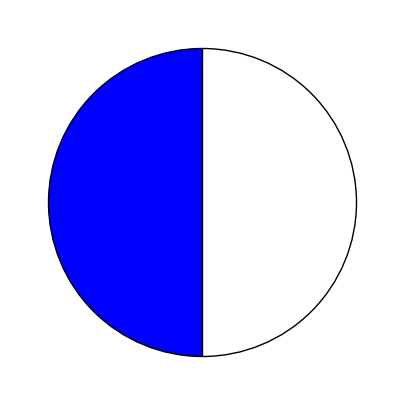

Label(value='Choose the fraction that matches the blue part of the visual representation above:')

Button(description='Fraction A: 3/5', style=ButtonStyle())

Button(description='Fraction B: 1/2', style=ButtonStyle())

Button(description='Fraction C: 2/5', style=ButtonStyle())

Output()

In [93]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import requests
from io import BytesIO
import ipywidgets as widgets
from IPython.display import display, clear_output


correct_counter = 0  # Initialize counter

def display_fraction_visual(fraction, shape='circle'):
    # Assuming fraction is a tuple like (1, 2) for 1/2
    numerator, denominator = fraction
    plt.figure(figsize=(5,5))

    if shape == 'circle':
        plt.pie([1]*denominator, colors=['blue']*numerator + ['white']*(denominator - numerator),
                startangle=90, wedgeprops=dict(edgecolor='black'))
        plt.gca().set_aspect('equal')

    elif shape == 'donut':
        plt.pie([1]*denominator, colors=['blue']*numerator + ['white']*(denominator - numerator),
                startangle=90, wedgeprops=dict(width=0.3, edgecolor='black'))
        plt.gca().set_aspect('equal')

    elif shape == 'rectangle':
        for i in range(denominator):
            color = 'blue' if i < numerator else 'white'
            plt.bar([0], [1], bottom=[i], color=color, edgecolor='black')
        plt.ylim(0, denominator)
        plt.axis('off')

    plt.show()

def on_button_clicked(b):
    global correct_counter, options, correct_fraction
    clear_output()
    if options[ord(b.description[9]) - ord('A')] == correct_fraction:
        correct_counter += 1
        print("Correct!")
        #if correct_counter == 5:
        #    print("Awesome! You've answered 5 questions in a row correctly!")
        #    display(Image(url=get_random_animal_image()))
        #    correct_counter = 0  # Reset counter
        if correct_counter == 5:
            print("Awesome! You've answered 5 questions in a row correctly!")
            response = requests.get(get_random_cat_image())
            img = Image.open(BytesIO(response.content))
            plt.imshow(img)
            plt.axis('off')  # to hide axis
            plt.show()
            correct_counter = 0  # Reset counter
    else:
        print("Wrong answer. Let's try again.")
        correct_counter = 0  # Reset counter if answer is wrong
    display_new_question()

def display_new_question():
    global correct_fraction, options, output, buttons

    fractions = [(1, 2), (2, 3), (3, 5), (1, 3), (3, 4), (2, 5)]  # List of possible fractions

    shape = random.choice(['circle', 'donut', 'rectangle'])
    correct_fraction = random.choice(fractions)
    display_fraction_visual(correct_fraction, shape)

    # Prepare options
    options = [correct_fraction]
    while len(options) < 3:
        fraction = random.choice(fractions)
        if fraction not in options:
            options.append(fraction)

    random.shuffle(options)

    buttons = [widgets.Button(description=f"Fraction {chr(65+i)}: {options[i][0]}/{options[i][1]}") for i in range(3)]
    output = widgets.Output()

    # Create a label with the question
    question_label = widgets.Label("Choose the fraction that matches the blue part of the visual representation above:")

    display(question_label, *buttons, output)

    for button in buttons:
        button.on_click(on_button_clicked)


display_new_question()


# Fraction comparison game

When you answer 5 questions in a row correctly, you will find a cute dog!

Welcome to the Fraction Comparison Game!
Two fractions will be displayed. Your task is to determine which one is larger or if they are equal.
Select level:


Button(description='Beginner', style=ButtonStyle())

Button(description='Normal', style=ButtonStyle())

Button(description='Advanced', style=ButtonStyle())

Let's begin!
Fraction A: 5/6
Fraction B: 3/4


Button(description='Fraction A is greater', style=ButtonStyle())

Button(description='They are equal', style=ButtonStyle())

Button(description='Fraction B is greater', style=ButtonStyle())

Correct answer!

Fraction A: 3/4
Fraction B: 1/3


Button(description='Fraction A is greater', style=ButtonStyle())

Button(description='They are equal', style=ButtonStyle())

Button(description='Fraction B is greater', style=ButtonStyle())

Correct answer!

Fraction A: 2/3
Fraction B: 1/2


Button(description='Fraction A is greater', style=ButtonStyle())

Button(description='They are equal', style=ButtonStyle())

Button(description='Fraction B is greater', style=ButtonStyle())

Correct answer!

Fraction A: 4/5
Fraction B: 3/4


Button(description='Fraction A is greater', style=ButtonStyle())

Button(description='They are equal', style=ButtonStyle())

Button(description='Fraction B is greater', style=ButtonStyle())

Correct answer!

Fraction A: 2/3
Fraction B: 1/2


Button(description='Fraction A is greater', style=ButtonStyle())

Button(description='They are equal', style=ButtonStyle())

Button(description='Fraction B is greater', style=ButtonStyle())

Correct answer!

Awesome! You've answered 5 questions in a row correctly!


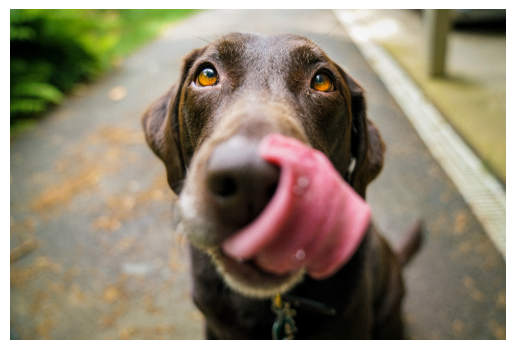

Fraction A: 1/2
Fraction B: 5/6


Button(description='Fraction A is greater', style=ButtonStyle())

Button(description='They are equal', style=ButtonStyle())

Button(description='Fraction B is greater', style=ButtonStyle())

In [ ]:
import random
from fractions import Fraction
import ipywidgets as widgets
from IPython.display import display
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# Image URL, you can use your own URL
image_url = "https://images.unsplash.com/photo-1560807707-8cc77767d783"

# Variables to keep track of the current streak and the highest streak
current_streak = 0
highest_streak = 0
level = None

def generate_fraction(level):
    """
    Function to generate a random fraction
    """
    if level == 'Beginner':
        max_val = 5
    elif level == 'Normal':
        max_val = 10
    else:
        max_val = 20

    numerator = random.randint(1, max_val)
    denominator = random.randint(numerator+1, max_val+1)  # denominator should be > numerator
    return Fraction(numerator, denominator)

def compare_fractions(level):
    """
    Function to compare two fractions
    """
    global current_streak
    global highest_streak

    fraction_A = generate_fraction(level)
    fraction_B = generate_fraction(level)

    print(f"Fraction A: {fraction_A}\nFraction B: {fraction_B}")  # Fractions are now displayed in separate lines

    button_greater = widgets.Button(description="Fraction A is greater")
    button_equal = widgets.Button(description="They are equal")
    button_less = widgets.Button(description="Fraction B is greater")

    def check_answer(b):
        global current_streak
        global highest_streak
        global level

        if b.description == "Fraction A is greater" and fraction_A > fraction_B:
            print("Correct answer!\n")  # Added '\n' for a new line
            current_streak += 1
        elif b.description == "They are equal" and fraction_A == fraction_B:
            print("Correct answer!\n")  # Added '\n' for a new line
            current_streak += 1
        elif b.description == "Fraction B is greater" and fraction_A < fraction_B:
            print("Correct answer!\n")  # Added '\n' for a new line
            current_streak += 1
        else:
            print("Wrong answer! Let's try again.\n")  # Added '\n' for a new line
            current_streak = 0

        # Check if current streak is a new high score
        if current_streak > highest_streak:
            highest_streak = current_streak

        # Display a message and a picture if the user answers 5 questions correctly in a row
        if current_streak == 5:
          print("Awesome! You've answered 5 questions in a row correctly!")
          response = requests.get(get_random_dog_image())
          img = Image.open(BytesIO(response.content))
          plt.imshow(img)
          plt.axis('off')  # to hide axis
          plt.show()

        # Display a message and a picture if the user answers 5 questions correctly in a row

        #if current_streak == 5:
        #    print("Awesome! You've answered 5 questions in a row correctly!")
        #    response = requests.get(image_url)
        #    img = Image.open(BytesIO(response.content))
        #    plt.imshow(img)
        #    plt.axis('off')  # to hide axis
        #    plt.show()

        compare_fractions(level)

    button_greater.on_click(check_answer)
    button_equal.on_click(check_answer)
    button_less.on_click(check_answer)

    display(button_greater, button_equal, button_less)

def main(level):
    compare_fractions(level)

print("Welcome to the Fraction Comparison Game!")
print("Two fractions will be displayed. Your task is to determine which one is larger or if they are equal.")

button_beginner = widgets.Button(description="Beginner")
button_normal = widgets.Button(description="Normal")
button_advanced = widgets.Button(description="Advanced")

def start_game(b):
    global level
    print("Let's begin!")
    level = b.description
    main(level)

button_beginner.on_click(start_game)
button_normal.on_click(start_game)
button_advanced.on_click(start_game)

print("Select level:")
display(button_beginner, button_normal, button_advanced)


# Addition of fractions

Find a cute cat!

Welcome to the Fraction Addition Game!
An addition of two fractions will be displayed. Your task is to determine if the sum is greater than, less than, or equal to 1.
Select level:


Button(description='Beginner', style=ButtonStyle())

Button(description='Normal', style=ButtonStyle())

Button(description='Advanced', style=ButtonStyle())

Let's begin!
1/5 + 1/4


Button(description='Sum is greater than 1', style=ButtonStyle())

Button(description='Sum equals 1', style=ButtonStyle())

Button(description='Sum is less than 1', style=ButtonStyle())

Correct answer!

2/3 + 5/6


Button(description='Sum is greater than 1', style=ButtonStyle())

Button(description='Sum equals 1', style=ButtonStyle())

Button(description='Sum is less than 1', style=ButtonStyle())

Correct answer!

5/6 + 2/5


Button(description='Sum is greater than 1', style=ButtonStyle())

Button(description='Sum equals 1', style=ButtonStyle())

Button(description='Sum is less than 1', style=ButtonStyle())

Correct answer!

2/5 + 1/3


Button(description='Sum is greater than 1', style=ButtonStyle())

Button(description='Sum equals 1', style=ButtonStyle())

Button(description='Sum is less than 1', style=ButtonStyle())

Correct answer!

2/3 + 1/2


Button(description='Sum is greater than 1', style=ButtonStyle())

Button(description='Sum equals 1', style=ButtonStyle())

Button(description='Sum is less than 1', style=ButtonStyle())

Correct answer!

Awesome! You've answered 5 questions in a row correctly!


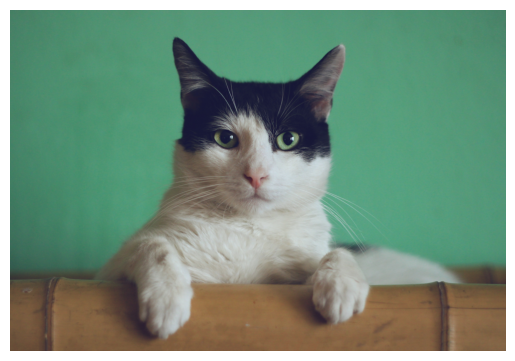

4/5 + 1/2


Button(description='Sum is greater than 1', style=ButtonStyle())

Button(description='Sum equals 1', style=ButtonStyle())

Button(description='Sum is less than 1', style=ButtonStyle())

In [ ]:
import random
from fractions import Fraction
import ipywidgets as widgets
from IPython.display import display
import requests
from PIL import Image
import matplotlib.pyplot as plt

# Image URL, you can use your own URL
image_url = "https://images.pexels.com/photos/617278/pexels-photo-617278.jpeg"

# Variables to keep track of the current streak and the highest streak
current_streak = 0
highest_streak = 0
level = None

def generate_fraction(level):
    """
    Function to generate a random fraction
    """
    if level == 'Beginner':
        max_val = 5
    elif level == 'Normal':
        max_val = 10
    else:
        max_val = 20

    numerator = random.randint(1, max_val)
    denominator = random.randint(numerator+1, max_val+1)  # denominator should be > numerator
    return Fraction(numerator, denominator)

def compare_fraction_to_one(level):
    """
    Function to compare the sum of two fractions to 1
    """
    global current_streak
    global highest_streak

    fraction_A = generate_fraction(level)
    fraction_B = generate_fraction(level)
    sum_fractions = fraction_A + fraction_B

    print(f"{fraction_A} + {fraction_B}")

    button_greater = widgets.Button(description="Sum is greater than 1")
    button_equal = widgets.Button(description="Sum equals 1")
    button_less = widgets.Button(description="Sum is less than 1")

    def check_answer(b):
        global current_streak
        global highest_streak
        global level

        if b.description == "Sum is greater than 1" and sum_fractions > 1:
            print("Correct answer!\n")  # Added '\n' for a new line
            current_streak += 1
        elif b.description == "Sum equals 1" and sum_fractions == 1:
            print("Correct answer!\n")  # Added '\n' for a new line
            current_streak += 1
        elif b.description == "Sum is less than 1" and sum_fractions < 1:
            print("Correct answer!\n")  # Added '\n' for a new line
            current_streak += 1
        else:
            print("Wrong answer! Let's try again.")
            current_streak = 0

        # Check if current streak is a new high score
        if current_streak > highest_streak:
            highest_streak = current_streak

        # Display a message and a picture if the user answers 5 questions correctly in a row
        if current_streak == 5:
          print("Awesome! You've answered 5 questions in a row correctly!")
          response = requests.get(get_random_cat_image())
          img = Image.open(BytesIO(response.content))
          plt.imshow(img)
          plt.axis('off')  # to hide axis
          plt.show()


        # Display a message and a picture if the user answers 5 questions correctly in a row
        #if current_streak == 5:
        #    print("Awesome! You've answered 5 questions in a row correctly!")
        #    response = requests.get(image_url)
        #    img = Image.open(BytesIO(response.content))
        #    plt.imshow(img)
        #    plt.axis('off')  # to hide axis
        #    plt.show()

        compare_fraction_to_one(level)

    button_greater.on_click(check_answer)
    button_equal.on_click(check_answer)
    button_less.on_click(check_answer)

    display(button_greater, button_equal, button_less)

def main(level):
    compare_fraction_to_one(level)

print("Welcome to the Fraction Addition Game!")
print("An addition of two fractions will be displayed. Your task is to determine if the sum is greater than, less than, or equal to 1.")

button_beginner = widgets.Button(description="Beginner")
button_normal = widgets.Button(description="Normal")
button_advanced = widgets.Button(description="Advanced")

def start_game(b):
    global level
    print("Let's begin!")
    level = b.description
    main(level)

button_beginner.on_click(start_game)
button_normal.on_click(start_game)
button_advanced.on_click(start_game)

print("Select level:")
display(button_beginner, button_normal, button_advanced)
